# Analyzing Fandango's Movie Rating System

## Introduction
The popular movie ratings aggregator [Fandango](https://www.fandango.com) was exposed in an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) by Walt Hickey in October 2015 for being biased in its rating system, inflating the movie ratings displayed to users by rounding up to the nearest half star. Fandango claimed this bias was due to a bug in its algorithm and promised to remedy the issue.

In this project, we will analyze more recent movie ratings data to determine if Fandango truly made changes to its movie ratings system after Hickey's analysis. To make such a determination, we will compare the characteristics of Fandango's rating system before and after the published analysis using two different datasets:
1. Walt Hickey's original movie ratings data, representing the [before](https://github.com/fivethirtyeight/data/tree/master/fandango) data, and
2. Dataquest's 2016-2017 movie ratings data, representing the [after](https://github.com/mircealex/Movie_ratings_2016_17) data.

Each dataset consists of a selection of movies with their respective scores from various websites, such as Rotten Tomatoes, Metacritic, IMDB, and Fandango.

## Exploring the Movie Ratings Data

Below we briefly explore the datasets representing the movie ratings data before and after Hick's analysis.

The pre-analysis dataset consists of 146 rows and 22 columns. Each row represents a different movie, with the first column stating the movie's title and the rest of the columns containing various ratings from separate sources for the given movie.

The post-analysis dataset contains 214 rows and 15 columns, with each row again corresponding to an individual movie and its collection of scores.

In [1]:
# read in datasets
import pandas as pd
movies_pre = pd.read_csv('fandango_score_comparison.csv')
movies_post = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
# explore datasets
print('PRE-ANALYSIS MOVIE DATA:')
movies_pre.head()

PRE-ANALYSIS MOVIE DATA:


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
movies_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
print('POST-ANALYSIS MOVIE DATA:')
movies_post.head()

POST-ANALYSIS MOVIE DATA:


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
movies_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


### Isolating Fandango Information

For the purposes of our analysis, we are interested specifically in Fandango's ratings, so we want to isolate the set of columns in each dataset containing the relevant information for future use.

In [6]:
# isolate columns related to Fandango's ratings
fandango_pre = movies_pre[['FILM', 'Fandango_Stars', 
                           'Fandango_Ratingvalue', 
                           'Fandango_votes', 'Fandango_Difference']].copy()
fandango_post = movies_post[['movie', 'year', 'fandango']].copy()

In [7]:
# check new datasets
print('pre-analysis fandango:')
fandango_pre.head()

pre-analysis fandango:


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
print('post-analysis fandango')
fandango_post.head()

post-analysis fandango


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


### Defining the Population of Interest

The population of interest in this analysis is the set of all movies that have been rated by Fandango at any point in time. Unfortunately, the data on hand is unlikely to be representative of the overall population.

The pre-analysis dataset contains only films released prior to August 24, 2015 and with scores on Rotten Tomatoes, Metacritic, and IMDB, as well as at least 30 fan reviews on Fandango. The post-analysis dataset contains only the most popular movies (i.e.e with the most number of votes on the ratings sites) released between 2016 and 2017. Neither sampling for either dataset is random.

## Adjusting Our Analysis Goal

Since the data we have on hand are not representative of the population of all movies ever rated on Fandango, we need to adjust our population of interest by selecting a subset of the larger population such that our datasets are representative of the smaller, more specific population. This in turn modifies our goal slightly.

We alter our population to be the set of all popular movies rated on Fandango in 2015 and 2016, and we refine the goal of our analysis to be identifying any changes in Fandango's rating system between 2015 and 2016 for popular movies.

With this new goal, we can now compare all Fandango ratings for popular movies released in 2015 to all Fandango ratings for popular movies released in 2016. We define "popular" here as having at least 30 fan ratings on Fandango, as Hicks did.

### Isolating the New Population Data

To move foward with our adjusted analysis, we first need to isolate from our datasets the sample points belonging to our new population of interest, i.e. movies released in 2015 and 2016 with at least 30 fan reviews on Fandango.

We know that the pre-analysis dataset contains only popular movies, since popularity was a sampling criterion. We must also verify that the post-analysis dataset contains only (or at least mostly) popular movies. Unfortunately, this dataset contains no information on the number of Fandango reviews. We can instead perform a quick check by manually looking up the number of Fandango ratings for a small number of movies selected randomly from the dataset. If the majority of the randomly selected movies are popular, we can conclude our dataset contains enough popular movies to be representative of our new population.

At the time of this analysis (April 2021), Fandango now only lists the Rotten Tomatoes scores, so we will check the movie's popularity by the number of Rotten Tomatoes Tomatometer reviews.

In [9]:
# get 10 random movies to manually check popularity
post_sample = fandango_post.sample(n=10, random_state=1)
post_sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [10]:
sample_reviews = [59, 232, 21, 179, 341, 54, 111, 346, 150, 419]
post_sample['reviews'] = sample_reviews
post_sample

,movie,year,fandango,reviews
108,Mechanic: Resurrection,2016,4.0,59
206,Warcraft,2016,4.0,232
106,Max Steel,2016,3.5,21
107,Me Before You,2016,4.5,179
51,Fantastic Beasts and Where to Find Them,2016,4.5,341
33,Cell,2016,3.0,54
59,Genius,2016,3.5,111
152,Sully,2016,4.5,346
4,A Hologram for the King,2016,3.0,150
31,Captain America: Civil War,2016,4.5,419


We see that 9 of 10 randomly sampled movies are considered popular by our definition. Therefore, we can move forward with our analysis confident that both our datasets are representative of our population of interest.

Finally, we want to isolate movies released in 2015 and 2016 from our pre- and post-analysis datasets, respectively. In the pre-analysis dataset, the release year can be extracted from the movie title in the `'FILM'` column, while in the post-analysis dataset, the release year can be gleaned directly from the `'year'` column.

In [11]:
## isolate 2015 and 2016 movies in pre- and post-analysis datasets
fandango_pre = fandango_pre[fandango_pre['FILM']
                            .str.contains('(2015)', regex=False)]
fandango_post = fandango_post[fandango_post['year'] == 2016]

## Comparing 2015 and 2016 Distributions

We first perform a high-level comparison between the shapes of the distributions of movie ratings for the 2015 and 2016 samples. Below, we plot the kernel density plots for both samples.

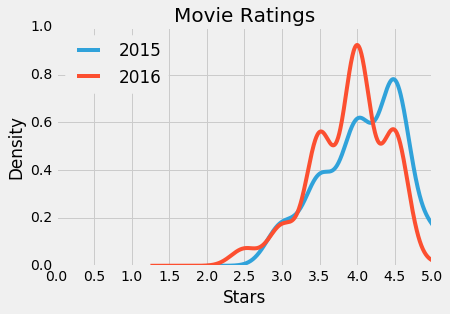

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
fandango_pre['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_post['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Movie Ratings', fontsize=20)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.show()

Both distributions are left skewed, with most of the movie ratings concentrated at the high end of the star scale. The 2015 distribution peaks around 4.5 stars, while the 2016 distribution peaks at a slightly lower rating of 4.0 stars. This negative shift in data from 2015 to 2016, where movies in 2016 were rated lower than those in 2015, suggests that Fandango may have implemented a change in their ratings system.

### Frequency Distribution Tables

Next, we compare the frequency distribution tables between the two distributions. Because the two distributions contain different numbers of movies, we want to compare the relative frequencies rather than the absolute frequencies. For readability, we present the relative frequencies as percentages.

In [22]:
# Fandango ratings frequency distributions
fandango_pre['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
fandango_post['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The above frequency distribution tables also show a clear negative shift in Fandango movie ratings from 2015 to 2016. Nearly 40% and 7% of movies in 2015 were rated 4.5 stars and 5.0 stars, respectively, as opposed to only 25% and 0.5% of movies in 2016. The majority of movies in 2015 were rated 4.5 stars, while the majority were rated 4.0 stars in 2016.

### Summary Statistics

Below, we compute and compare a few summary statistics, i.e. the mean, median, and mode, of each distribution.

In [44]:
stats_2015 = [fandango_pre['Fandango_Stars'].mean(),
              fandango_pre['Fandango_Stars'].median(),
              fandango_pre['Fandango_Stars'].mode()[0]]
print('2015 summary statistics:')
print('mean:', stats_2015[0])
print('median:', stats_2015[1])
print('mode:', stats_2015[2])

2015 summary statistics:
mean: 4.0852713178294575
median: 4.0
mode: 4.5


In [45]:
stats_2016 = [fandango_post['fandango'].mean(),
              fandango_post['fandango'].median(),
              fandango_post['fandango'].mode()[0]]
print('2016 summary statistics:')
print('mean:', stats_2016[0])
print('median:', stats_2016[1])
print('mode:', stats_2016[2])

2016 summary statistics:
mean: 3.887434554973822
median: 4.0
mode: 4.0


In [40]:
mean_diff = stats_2016[0] - stats_2015[0]
median_diff = stats_2016[1] - stats_2015[1] 
mode_diff = stats_2016[2] - stats_2015[2]
print('mean diff:', mean_diff)
print('median diff:', median_diff)
print('mode diff:', mode_diff)

mean diff: -0.19783676285563567
median diff: 0.0
mode diff: 0   -0.5
dtype: float64


The median rating is the same between both distributions, but the mean and mode of the 2016 distribution are lower than those of the 2015 distribution. The mean rating in 2016 is 0.20 stars less than that in 2015, and the nonzero mode in 2016 is 0.5 stars under that in 2015. Below is a grouped bar graph that illustrates the summary statistics comparatively between the two years.

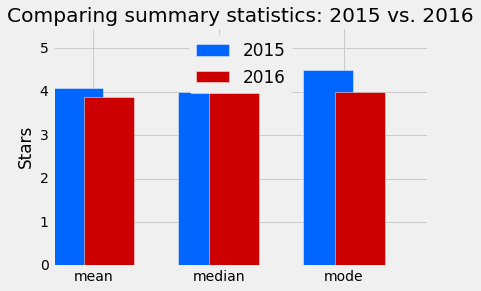

In [88]:
plt.bar([0, 2, 4], stats_2015, color = '#0066FF', label = '2015')
plt.bar([0.5, 2.5, 4.5], stats_2016, color = '#CC0000', label = '2016')
plt.xticks([0.65, 2.65, 4.65], ['mean', 'median', 'mode'])
plt.title('Comparing summary statistics: 2015 vs. 2016')
plt.ylabel('Stars')
plt.ylim(0,5.5)
plt.legend(loc = 'upper center')
plt.show()

## Conclusion

We have determined from our analysis that the Fandango ratings for popular movies in 2016 are clearly lower than those in 2015. The average Fandango rating for a popular movie in 2016 was 3.89, compared with 4.09 in 2015. However, we can not at this time conclude that this difference is due to any change in Fandango's ratings system algorithm. Further analysis would need to be done, perhaps on a larger data set containing more movies released in later years and/or more information on the details of the Fandango ratings system, to draw any reasonable conclusion on the cause of the negative shift in ratings. 